In [1]:
ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""            ### Please insert here your own tokens coz its private. You need to generate it from Twitter Developer
CONSUMER_KEY = ""
CONSUMER_SECRET = ""

In [2]:
import numpy as np
import pandas as pd

In [3]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [4]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
 
##import twitter_credentials
import numpy as np
import pandas as pd


# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets


# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)


class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="CocaCola", count=200)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    
    print(df.head(10))

                                              Tweets                   id  \
0  @BRANEO11 Hi Bra! We are sorry if you are not ...  1303685764866285569   
1  @PauliePeace We suggest reaching out to your l...  1303685419142459392   
2  @magentish Hi Stephanie. Thanks for being a de...  1303683997239857154   
3  @erickyser We could only spice things up for s...  1303682749673418752   
4  @stevejbrown23 Hi Steve. We appreciate your lo...  1303680171912855552   
5  @guzutite Hi Shane. We appreciate your loyalty...  1303479751839973376   
6  @ethvl Hi! You have reached Coca-Cola USA. We ...  1303444929197342721   
7  @SarahJaneAustin We appreciate your loyalty. I...  1303437406855729152   
8  @selkiecrow We appreciate your loyalty. In ord...  1303431387006078976   
9  @Mark39180317 We'd like to help, Mark. Please ...  1303418782904455170   

   len                date    source  likes  retweets  
0  140 2020-09-09 13:24:42  Sprinklr      0         1  
1  140 2020-09-09 13:23:19  Sprinklr    

In [5]:
df.tail()

,Tweets,id,len,date,source,likes,retweets
195,@SBlue84 We truly appreciate your loyalty to o...,1298668244023246859,140,2020-08-26 17:06:52,Sprinklr,0,0
196,"@LaDevino Hi, Lala! Please send us a DM with y...",1298654458264596481,140,2020-08-26 16:12:05,Sprinklr,1,0
197,@gwendt01 Sorry for any confusion! The packagi...,1298627086618370050,140,2020-08-26 14:23:19,Sprinklr,0,0
198,@rmack25 Hi Robert. Thank you for bringing thi...,1298617917781745666,140,2020-08-26 13:46:53,Sprinklr,1,0
199,"@blaircartwright Sorry for any confusion, Blai...",1298615367586263042,140,2020-08-26 13:36:45,Sprinklr,0,0


In [6]:
xx=df['Tweets']

In [7]:
xx.head()

0    @BRANEO11 Hi Bra! We are sorry if you are not ...
1    @PauliePeace We suggest reaching out to your l...
2    @magentish Hi Stephanie. Thanks for being a de...
3    @erickyser We could only spice things up for s...
4    @stevejbrown23 Hi Steve. We appreciate your lo...
Name: Tweets, dtype: object

In [8]:
xx.shape

(200,)

In [9]:
voc_size=5000

In [10]:
import nltk
import re
from nltk.corpus import stopwords

In [11]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', df['Tweets'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [12]:
corpus

['braneo hi bra sorri pleas product purchas ask contact coca http co w helam xm',
 'pauliepeac suggest reach local offic unit kingdom assist http co njlnwvv yj',
 'magentish hi stephani thank dedic flavor fan time shift prioriti http co br mibm',
 'erickys could spice thing long coke cinnamon limit time offer holiday season',
 'stevejbrown hi steve appreci loyalti meet extrem high demand certain product temp http co tr buaghpk',
 'guzutit hi shane appreci loyalti coke zero sugar due high demand certain product http co sswsiegjm',
 'ethvl hi reach coca cola usa ask contact coca cola ireland ask local product sel http co yyuoetep',
 'sarahjaneaustin appreci loyalti order meet extrem high demand temporarili focus http co ijwrif cn',
 'selkiecrow appreci loyalti order meet extrem high demand temporarili focus http co qykesak n',
 'mark like help mark pleas give us call get coke mon fri p est provid referenc http co lw klrd gg',
 'conniedemercur hi conni sorri find diet coke splenda unfortu

In [13]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [14]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[1428,
  4832,
  683,
  3913,
  3050,
  4859,
  4004,
  4299,
  2297,
  1388,
  2173,
  2911,
  4507,
  2900,
  1829],
 [4995, 1198, 1351, 1537, 2274, 3703, 4309, 3939, 2173, 2911, 1314, 3004],
 [3606,
  4832,
  3616,
  1754,
  4,
  724,
  229,
  3664,
  2865,
  4778,
  2173,
  2911,
  4395,
  454],
 [4565, 2900, 2308, 3723, 2704, 2329, 4799, 179, 3664, 717, 2848, 3817],
 [1790,
  4832,
  787,
  2457,
  1066,
  3908,
  4700,
  1294,
  4092,
  2022,
  4859,
  2643,
  2173,
  2911,
  3611,
  1464],
 [3540,
  4832,
  170,
  2457,
  1066,
  2329,
  4746,
  2520,
  4055,
  1294,
  4092,
  2022,
  4859,
  2173,
  2911,
  3451],
 [2737,
  4832,
  1351,
  1388,
  995,
  1451,
  4299,
  2297,
  1388,
  995,
  350,
  4299,
  1537,
  4859,
  365,
  2173,
  2911,
  4952],
 [1854,
  2457,
  1066,
  391,
  3908,
  4700,
  1294,
  4092,
  3564,
  2129,
  2173,
  2911,
  751,
  94],
 [4619,
  2457,
  1066,
  391,
  3908,
  4700,
  1294,
  4092,
  3564,
  2129,
  2173,
  2911,
  4206,
  1483],
 [3933,

In [15]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4507 2900 1829]
 [   0    0    0 ... 2911 1314 3004]
 [   0    0    0 ... 2911 4395  454]
 ...
 [   0    0    0 ... 2173 2911 2006]
 [   0    0    0 ... 2173 2911  612]
 [   0    0    0 ... 2911 4798 4606]]


In [16]:
embedded_docs[0]

array([   0,    0,    0,    0,    0, 1428, 4832,  683, 3913, 3050, 4859,
       4004, 4299, 2297, 1388, 2173, 2911, 4507, 2900, 1829])

In [17]:
import numpy as np
X_final=np.array(embedded_docs)

In [18]:
X_final.shape

(200, 20)

In [19]:
from tensorflow.keras.models import save_model, load_model

In [20]:
filepath= './saved_model'

In [21]:
model=load_model(filepath, compile = True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
predctn= model.predict_classes(X_final)

In [25]:
predctn

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [26]:
predctn.shape

(200, 1)

In [27]:
gg=np.reshape(predctn,200)

In [28]:
gg1=pd.Series(gg)

In [29]:
new_df=pd.DataFrame(columns=['Tweet','Sentiment'])

In [30]:
new_df['Tweet']=df['Tweets']

In [31]:
new_df['Sentiment']=gg1

In [32]:
new_df

,Tweet,Sentiment
0,@BRANEO11 Hi Bra! We are sorry if you are not ...,0
1,@PauliePeace We suggest reaching out to your l...,0
2,@magentish Hi Stephanie. Thanks for being a de...,1
3,@erickyser We could only spice things up for s...,0
4,@stevejbrown23 Hi Steve. We appreciate your lo...,0
...,...,...
195,@SBlue84 We truly appreciate your loyalty to o...,0
196,"@LaDevino Hi, Lala! Please send us a DM with y...",0
197,@gwendt01 Sorry for any confusion! The packagi...,1
198,@rmack25 Hi Robert. Thank you for bringing thi...,1


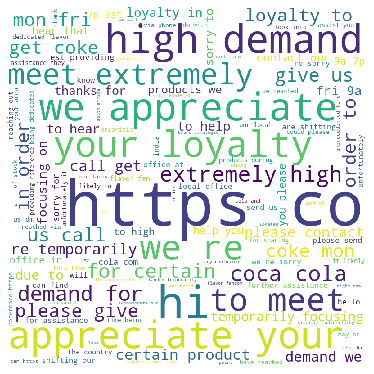

In [54]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in new_df.Tweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords =stopwords , 
                min_font_size = 10).generate(comment_words) 
#font_path='Lohit-Devanagari.ttf',  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [35]:
new_df1=pd.DataFrame(columns=['Tweet','Sentiment','length','date','likes','retweets'])

In [37]:
new_df1['Tweet']=new_df['Tweet']
new_df1['Sentiment']=new_df['Sentiment']
new_df1['length']=df['len']
new_df1['date']=df['date']
new_df1['likes']=df['likes']
new_df1['retweets']=df['retweets']

In [38]:
new_df1

,Tweet,Sentiment,length,date,likes,retweets
0,@BRANEO11 Hi Bra! We are sorry if you are not ...,0,140,2020-09-09 13:24:42,0,1
1,@PauliePeace We suggest reaching out to your l...,0,140,2020-09-09 13:23:19,0,0
2,@magentish Hi Stephanie. Thanks for being a de...,1,140,2020-09-09 13:17:40,0,0
3,@erickyser We could only spice things up for s...,0,120,2020-09-09 13:12:43,0,0
4,@stevejbrown23 Hi Steve. We appreciate your lo...,0,140,2020-09-09 13:02:28,0,0
...,...,...,...,...,...,...
195,@SBlue84 We truly appreciate your loyalty to o...,0,140,2020-08-26 17:06:52,0,0
196,"@LaDevino Hi, Lala! Please send us a DM with y...",0,140,2020-08-26 16:12:05,1,0
197,@gwendt01 Sorry for any confusion! The packagi...,1,140,2020-08-26 14:23:19,0,0
198,@rmack25 Hi Robert. Thank you for bringing thi...,1,140,2020-08-26 13:46:53,1,0
